In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Import an ESRI Shapefile using geopandas - how to read shapefile - districts.shp 
districts = gpd.read_file(r'C:\Users\jh37495\Geospatial Data Science\Introduction to GeoPandas\Shapefiles\districts.shp')

In [6]:
# Shapefile -> geopandas/geo data frame
districts

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."
5,Antrim and Newtownabbey,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063..."
6,Ards and North Down,"MULTIPOLYGON (((-5.74192 54.67759, -5.74190 54..."
7,Fermanagh and Omagh,"POLYGON ((-6.99814 54.78009, -6.99806 54.78010..."
8,Derry City and Strabane,"POLYGON ((-7.25762 55.06648, -7.25759 55.06648..."
9,Causeway Coast and Glens,"MULTIPOLYGON (((-6.48405 55.25194, -6.48401 55..."


In [7]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [8]:
districts.shape

(11, 2)

<AxesSubplot:>

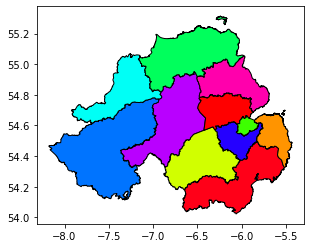

In [14]:
# How to plot a shapefile
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')

<AxesSubplot:>

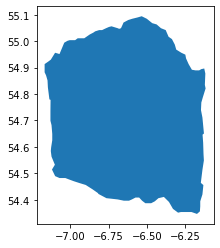

In [17]:
# Import area_of_interest 
area_of_interest = gpd.read_file(r'C:\Users\jh37495\Geospatial Data Science\Introduction to GeoPandas\Shapefiles\area_of_interest.shp')
area_of_interest.plot()

<AxesSubplot:>

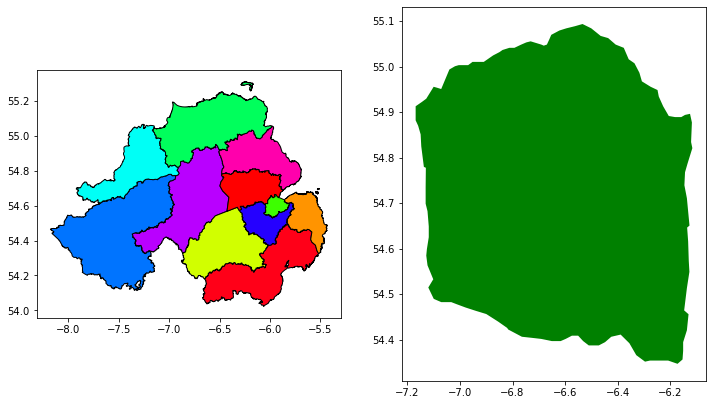

In [25]:
# Plot the figures side by side
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 8))
districts.plot(ax = ax1,cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax2, color = 'green')

In [29]:
atms = gpd.read_file(r'C:\Users\jh37495\Geospatial Data Science\Introduction to GeoPandas\Shapefiles\atms.shp')

<AxesSubplot:>

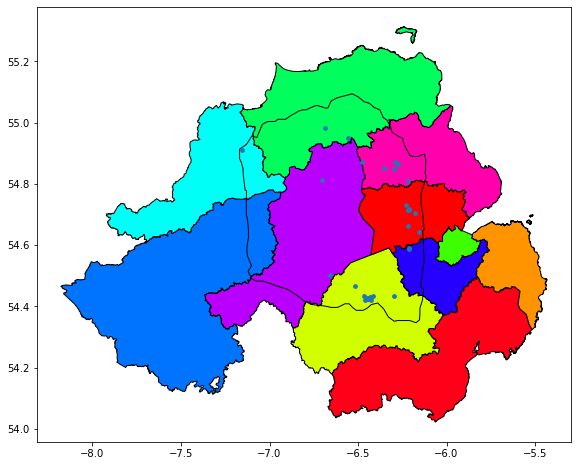

In [32]:
# Plot Multiple layers 
fig, ax = plt.subplots(figsize = (10, 8))
districts.plot(ax = ax,cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')
atms.plot(ax = ax, markersize = 14)

In [34]:
# How to work on projections using geopandas - coordinate reference system - wgs1984
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

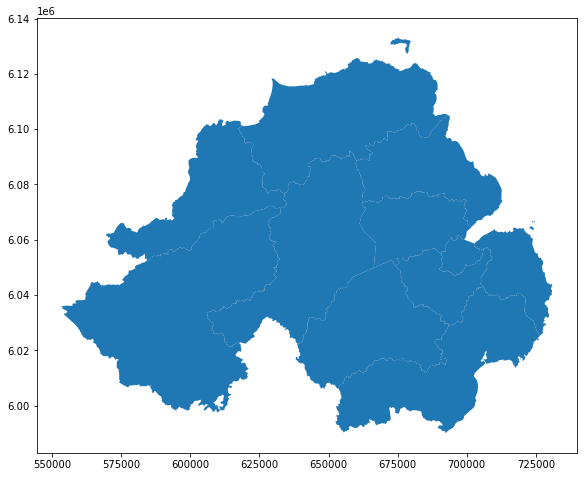

In [37]:
# Reprojecting GeoPandas GeoDataFrames - converting epsg:4326 to epsg:32629 (WGS84/UTM zone 29N) 
districts = districts.to_crs(epsg = 32629)
districts.plot(figsize = (10, 8))
# x, y values change

In [38]:
area_of_interest = area_of_interest.to_crs(epsg = 32629)

<AxesSubplot:>

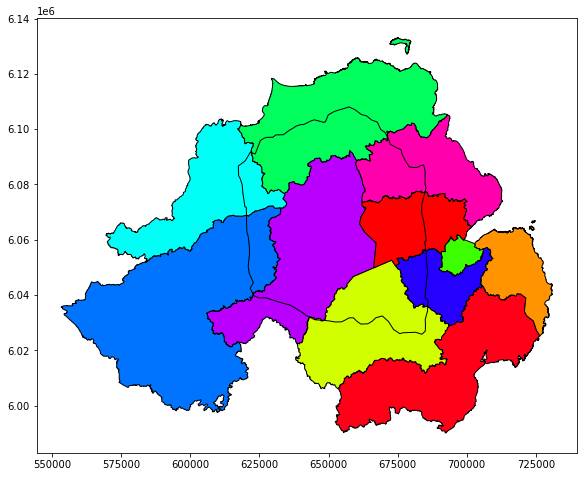

In [39]:
# Plot Multiple REPROJECTED layers 
fig, ax = plt.subplots(figsize = (10, 8))
districts.plot(ax = ax,cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')

<AxesSubplot:>

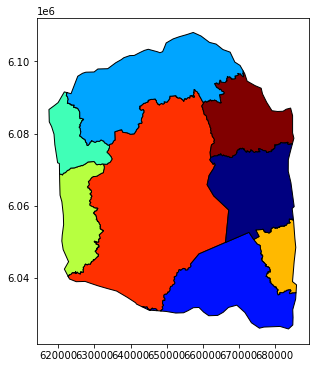

In [44]:
# Intersect layers using geopandas
districts_in_aoi = gpd.overlay(districts, area_of_interest, how = 'intersection')
districts_in_aoi.plot(figsize = (8, 6), cmap = 'jet', edgecolor = 'black', column = 'district')

In [47]:
# How to calculate areas of the intersected layer using geopandas
districts_in_aoi['area'] = districts_in_aoi.area / 1000000 
# area unit: squared kilometers

In [48]:
districts_in_aoi

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658017.072 6091916.291, 658023.630 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684916.646 6077240.234, 684908.771 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.696 6035736.759, 685894.090 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((643152.107 6031981.867, 643152...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682226.240 6077404.748, 682239.947 6...",462.822918
5,Fermanagh and Omagh,0,"POLYGON ((628746.570 6072158.485, 628751.931 6...",262.996444
6,Derry City and Strabane,0,"POLYGON ((622292.459 6091384.089, 622292.384 6...",187.500979
7,Causeway Coast and Glens,0,"POLYGON ((671302.332 6097252.019, 671301.064 6...",747.580677


In [49]:
# Export GeoPandas GeoDataFrames into ESRI Shapefiles
districts_in_aoi.to_file('districts_in_aoi.shp', driver = 'ESRI Shapefile')